In [1]:
import sys

sys.path.append('./source/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy import interpolate as intp
import importlib
import healpy

from source import plots
from source import prob_dists as pd
from utils import read_param_file, update_params

In [3]:
param_file = './source/n0.params'
params = read_param_file(param_file)
p = params

exposure = 5 * 14000 / (4 * np.pi)
p = update_params(param_file, p, 'exposure', exposure)

phipp = 7.12073e-30
fwimp = phipp * 8 * np.pi / 1e-28
# fwimp = 1e-4
p = update_params(param_file, p, 'fwimp', fwimp)

p = update_params(param_file, p, 'bg', 1)
p = update_params(param_file, p, 'beg', 1)

print(exposure, fwimp)
p

5570.423008216337 1.7896346444957159


{'R_G': 220,
 'd_solar': 8.5,
 'psi': 40,
 'M_min': 0.01,
 'M_max': 10000000000.0,
 'fwimp': 1.7896346444957159,
 'mean_params': {'a': 77.4, 'b': 0.87, 'c': -0.23},
 'nside': 128,
 'area_fermi': 2000.0,
 'n': 0,
 'log_flux_min': -15,
 'log_flux_max': -5,
 'N': 1000,
 'log_k_min': -3,
 'log_k_max': 6,
 'N_k': 250000,
 'psh_log_f_min': -5,
 'psh_log_f_max': -3.5,
 'N_psh': 500,
 'omega_pixel': 6.391586616190171e-05,
 'exposure': 5570.423008216337,
 'iso_flux_bg': 0.0008939106670451649,
 'gal_flux_bg_file': './output/gal_flux_bg.npy',
 'bg': 1,
 'beg': 1}

In [4]:
nside = p['nside']
npix = healpy.nside2npix(nside)
lon, lat = healpy.pix2ang(nside, range(npix), lonlat=True)
ang_dists = np.rad2deg(np.arccos(np.cos(np.deg2rad(lon)) * np.cos(np.deg2rad(lat))))
good_indices = (abs(lat) >= 40)

less than zero 0
(196608,) (195, 70144)
[]


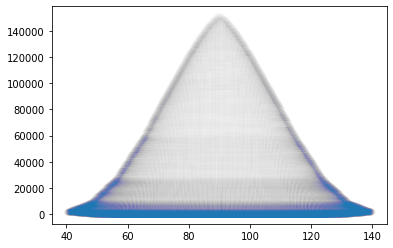

In [5]:
## S-WAVE
s_psh, s_pshfunc2d, s_fluxes, _ = pd.psh_s(ang_dists[good_indices], return_all=True)
s_psh = s_psh
s_fluxes = s_fluxes
s_psh /= np.trapz(s_psh, s_fluxes, axis=0)

print('less than zero', np.sum(s_psh < 0))
s_counts = np.arange(0, 500)
print(ang_dists.shape, s_psh.shape)
print(s_psh[s_psh < 0])
plt.scatter(ang_dists[good_indices], s_psh[40], alpha=0.005)

In [6]:
# for p, f in zip()

In [7]:
# s_psh /= np.trapz(s_psh, s_fluxes, axis=0)
np.trapz(s_psh, s_fluxes, axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

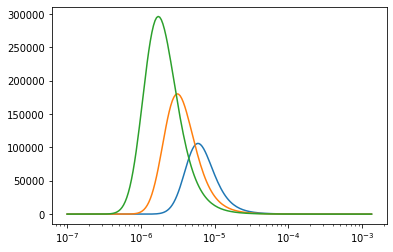

In [8]:
for i in [4000, 24000, 57000]:
    plt.plot(s_fluxes, s_psh[:, i])
plt.xscale('log')

less than zero 0


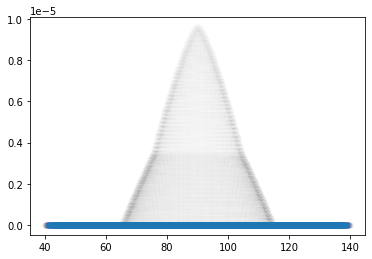

In [9]:
## SOM
som_psh, som_pshfunc2d, som_fluxes, _= pd.psh_som(ang_dists[good_indices], return_all=True)
print('less than zero', np.sum(s_psh < 0))
som_counts = np.arange(0, 2000)
plt.scatter(ang_dists[good_indices], som_psh[0], alpha=0.005)

In [10]:
np.trapz(som_psh, som_fluxes, axis=0), som_psh[:, -1]

(array([1., 1., 1., ..., 1., 1., 1.]),
 array([9.59454318e-06, 1.14744581e-05, 1.43436084e-05, 1.30507811e-05,
        2.54332398e-03, 3.56694979e+00, 3.42430881e+02, 4.54770431e+03,
        1.50043628e+04, 1.96987107e+04, 1.50195475e+04, 8.76755629e+03,
        4.67501736e+03, 2.51424336e+03, 1.41687684e+03, 7.92820284e+02,
        3.88999434e+02, 1.67553052e+02, 6.86348040e+01, 2.77557622e+01,
        1.07960971e+01, 3.82028879e+00, 1.23571128e+00, 3.80997393e-01,
        1.11669830e-01, 3.00900238e-02, 7.44529501e-03, 1.71660463e-03,
        3.70465057e-04, 7.21304707e-05, 8.96304315e-06, 8.41838224e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0

In [11]:
# backgrounds
gal_bg = np.load(p['gal_flux_bg_file'])[good_indices] * p['exposure']
iso_bg = p['iso_flux_bg'] * p['exposure']
bg_count = gal_bg + iso_bg

In [12]:
# pc for generating skymaps
s_pc_of_psi = pd.pc_of_psi(p, s_pshfunc2d, s_fluxes, s_counts)
som_pc_of_psi = pd.pc_of_psi(p, som_pshfunc2d, som_fluxes, som_counts)

# choose between s and som
pc_of_psi = s_pc_of_psi 

background = True 



largest count is 65.0 ...this may take a while


In [13]:
# search parameters
num_search = 50
p['fwimp'] *= 1

fwimps = np.logspace(np.log10(p['fwimp'])-.5, np.log10(p['fwimp'])+.5, num_search)
# fwimps = np.logspace(np.log10(p['fwimp'])-0.5, np.log10(p['fwimp'])+0.5, num_search)

exposure_search = np.logspace(0, 1, num=3) * p['exposure']
# exposure_search = [1]

In [14]:
 def likelihood_run_for_model(pshfunc2d, counts, psh, fluxes, poisson_rescale=1):
    # run likelihoods
    s_S = np.zeros((len(exposure_search), num_search))
    som_S = np.zeros((len(exposure_search), num_search))
    poisson_S = np.zeros((len(exposure_search), num_search))

    total, mean, std, meanpc = [], [], [], []
    for i, exposure in enumerate(exposure_search):
        p['exposure'] = exposure

        gal_bg = np.load(p['gal_flux_bg_file'])[good_indices] * p['exposure'] * p['bg']
        iso_bg = p['iso_flux_bg'] * p['exposure'] * p['beg']
        bg_count = gal_bg + iso_bg

        # make the simulated skymap
        psis = np.linspace(40, 180, num=500)
        
        bg_count = np.array([0])
        counts = np.arange(0, bg_count.max() + 10 * np.sqrt(p['exposure'] * p['fwimp'] * fluxes.max()))
#         counts = np.arange(100)

        pshdat = pshfunc2d(ang_dists[good_indices], fluxes)
        pshdat /= np.trapz(pshdat, fluxes, axis=0)[np.newaxis, :]

        pc_psi = np.trapz(pshdat[..., np.newaxis] * stats.poisson.pmf(counts[np.newaxis, np.newaxis, :], p['exposure'] * p['fwimp'] * fluxes[:, np.newaxis, np.newaxis]), fluxes, axis=0)

        print('bad pc norm for generating data:', np.sum(np.abs(np.sum(pc_psi, axis=-1)-1) > 1e-8))
#         pc_psi /= np.sum(pc_psi, axis=-1)[:, np.newaxis]
        
#         print(pc_psi.shape, np.sum(pc_psi, axis=-1))
        print('check pc norm', np.allclose(np.sum(pc_psi, axis=-1), 1))
        print('check pc limits:', np.sum(pc_psi == counts[-1]))
        
        pc_of_psi = pc_psi
#         pc_of_psi = intp.interp1d(psis, pc_psi, axis=0)
#         print(pc_of_psi(40), pc_psi[0])
        # generate sky map
    #     pc_of_psi = pd.pc_of_psi(p, s_pshfunc2d, s_fluxes, s_counts, bg_count)
        bg_count=None
        subcounts = pd.generate_skymap_sample_pc(p, pc_of_psi, ang_dists[good_indices], good_indices, return_subcounts=True, save_output=True, bg_counts=bg_count)
#         subcounts, ang_dists, bg_counts = pd.generate_skymap_sample_pc(p, pc_of_psi, ang_dists, return_subcounts=True, save_output=True, bg_counts=bg_count)
        print('generated skymap with', p['fwimp'])
        print(subcounts)
    #     subcounts, ang_dists, bg_counts = pd.generate_skymap_sample_pc_2(p, s_pshfunc2d, s_fluxes, return_subcounts=True, save_output=True, with_bg=background)
        if np.all(subcounts == 0):
            print('panic')
            break
        mean_pc = np.trapz(counts * pc_psi[0], counts)
        meanpc.append(mean_pc)
        print('mean pc', mean_pc)
        total.append(subcounts.sum())
        mean.append(subcounts.mean())
        std.append(subcounts.std())
        print('total subcounts', np.sum(subcounts), '\t mean', subcounts.mean(), '\t std', subcounts.std())

#         counts = s_counts

#         bg_count = gal_bg * 0.97 + iso_bg 
    #     fwimps = np.array([1e-20])
        bg_count=np.array([0])
        S = pd.likelihood(p, s_psh, subcounts.astype(np.int16), s_fluxes, fwimps, bg_count=bg_count)
        s_S[i] = S
        print('finish swave')

        S = pd.likelihood(p, som_psh, subcounts.astype(np.int16), som_fluxes, fwimps/100, bg_count=bg_count)
        som_S[i] = S
        print('finish som')

        S = pd.poisson_likelihood(p, psh, subcounts.astype(np.int16), fluxes, fwimps/poisson_rescale, bg_count=bg_count)
        poisson_S[i] = S
        print('finish poi')

        print(i+1, '/', len(exposure_search))
        
    return [s_S, som_S, poisson_S]

In [ ]:
SS = []

SS.append(likelihood_run_for_model(s_pshfunc2d, s_counts, s_psh, s_fluxes))
p['fwimp'] /= 100
SS.append(likelihood_run_for_model(som_pshfunc2d, som_counts, som_psh, som_fluxes, poisson_rescale=100))
p['fwimp'] *= 100

bad pc norm for generating data: 0
check pc norm True
check pc limits: 0
bg check: False 6673.0
saved in ./output/n0_skymap_52267.npy
generated skymap with 1.7896346444957159
[0. 0. 0. ... 0. 0. 0.]
mean pc 0.21604318420170784
total subcounts 6673.0 	 mean 0.09513286952554745 	 std 0.4650811157772625


In [ ]:
fig, axss = plt.subplots(ncols=3, nrows=2, figsize=(17, 8), sharey=True, gridspec_kw={'wspace': 0})
i = 0
lw = 5
zorder = 1

axs = axss[0]

for ax, s, lab in zip(axs, SS[0], ['s-wave L', 'som L', 'poisson L']):
    colors = iter(['xkcd:mulberry', 'xkcd:wheat', 'xkcd:mossy green', 'xkcd:cool blue', 'xkcd:blush pink'])
    for expdat, expo in zip(s, exposure_search):
        if lab == 'som L':
            ax.plot(fwimps / 100, np.exp(-0.5*(expdat - expdat.min())), label=f'{expo:.2}cm2s', alpha=0.9, lw=1, color=next(colors))
            ax.axvline(p['fwimp']/100, ls='--', color='xkcd:steel gray')
#             ax.plot(fwimps/100, expdat - expdat.min(), label=f'{expo:.2}cm2s')
            print(lab, expdat.min(),  '\t', fwimps[np.exp(-0.5*(expdat - expdat.min())).argmax()]/100)
        else:
            ax.plot(fwimps, np.exp(-0.5*(expdat - expdat.min())), label=f'{expo:.2}cm2s', alpha=0.9, lw=1, color=next(colors))
            ax.axvline(p['fwimp'], ls='--', color='xkcd:steel gray')
#             ax.plot(fwimps, expdat - expdat.min(), label=f'{expo:.2}cm2s')
            print(lab, expdat.min(),  '\t', fwimps[np.exp(-0.5*(expdat - expdat.min())).argmax()])

    ax.set_xscale('log')
    
axs = axss[1]
p['fwimp'] /=100
for ax, s, lab in zip(axs, SS[1], ['s-wave L', 'som L', 'poisson L']):
    colors = iter(['xkcd:mulberry', 'xkcd:wheat', 'xkcd:mossy green', 'xkcd:cool blue', 'xkcd:blush pink'])
    for expdat, expo in zip(s, exposure_search):
        if lab == 'som L' or lab == 'poisson L':
            ax.plot(fwimps / 100, np.exp(-0.5*(expdat - expdat.min())), label=f'{expo:.2}cm2s', alpha=0.9, lw=1, color=next(colors))
            ax.axvline(p['fwimp'], ls='--', color='xkcd:steel gray')
#             ax.plot(fwimps/100, expdat - expdat.min(), label=f'{expo:.2}cm2s')
            print(lab, expdat.min(),  '\t', fwimps[np.exp(-0.5*(expdat - expdat.min())).argmax()]/100)
        else:
            ax.plot(fwimps, np.exp(-0.5*(expdat - expdat.min())), label=f'{expo:.2}cm2s', alpha=0.9, lw=1, color=next(colors))
            ax.axvline(p['fwimp']*100, ls='--', color='xkcd:steel gray')
#             ax.plot(fwimps, expdat - expdat.min(), label=f'{expo:.2}cm2s')
            print(lab, expdat.min(),  '\t', fwimps[np.exp(-0.5*(expdat - expdat.min())).argmax()])

    ax.set_xscale('log')
    
for ax in axss[-1]:
    ax.set_xlabel('fwimp')
    
axss[0, 0].set_ylabel('L for s-wave data')
axss[1, 0].set_ylabel('L for som data')

axss[0, 0].set_title('s-wave')
axss[0, 1].set_title('som')
axss[0, 2].set_title('poisson')
    
axss.flatten()[-1].legend()
#     ax.set_yscale('log')
#     ax.set_ylim(bottom=0, top=10)
print(p['fwimp'])

Add:
- Float beg but fix bg to 0.97
- Float beg w/ same bg
- Generate w/ no DM signal and fit s/som/poi
- Add to overleaf
- 

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))

ax = axs[0]
s_S, som_S, poisson_S = SS[0]
max_swave = np.amin(s_S, axis=-1)
max_som = np.amin(som_S, axis=-1)
max_poi = np.amin(poisson_S, axis=-1)
ax.plot(exposure_search, -max_swave + max_som, ls='', marker='*', color='xkcd:royal purple', label=r'$\mathcal{S}_{min}^{som} - \mathcal{S}_{min}^{s}$')
ax.plot(exposure_search, -max_swave + max_poi, ls='', marker='*', color='xkcd:terra cotta', label=r'$\mathcal{S}_{min}^{poi} - \mathcal{S}_{min}^{s}$')
ax.plot(exposure_search, max_som - max_poi, ls='', marker='*', color='xkcd:pink', label=r'$\mathcal{S}_{min}^{som} - \mathcal{S}_{min}^{poi}$')
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_ylabel(r'$\Delta\mathcal{S}_{min}$', fontsize='x-large')
ax.set_xlabel(r'Exposure', fontsize='x-large')
ax.legend()
 
ax = axs[1]
s_S, som_S, poisson_S = SS[1]
max_swave = np.amin(s_S, axis=-1)
max_som = np.amin(som_S, axis=-1)
max_poi = np.amin(poisson_S, axis=-1)
ax.plot(exposure_search, max_swave - max_som, ls='', marker='*', color='xkcd:royal purple', label=r'$\mathcal{S}_{min}^{s} - \mathcal{S}_{min}^{som}$')
ax.plot(exposure_search, max_swave - max_poi, ls='', marker='*', color='xkcd:terra cotta', label=r'$\mathcal{S}_{min}^{s} - \mathcal{S}_{min}^{poi}$')
ax.plot(exposure_search, - max_som + max_poi, ls='', marker='*', color='xkcd:pink', label=r'$\mathcal{S}_{min}^{poi} - \mathcal{S}_{min}^{som}$')
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_ylabel(r'$\Delta\mathcal{S}_{min}$', fontsize='x-large')
ax.set_xlabel(r'Exposure', fontsize='x-large')
ax.legend()

axs[0].set_title('s-wave data')
axs[1].set_title('som data')

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
axs[0].plot(exposure_search, mean, label='mean', marker='o', ms=10)
axs[0].set_title('mean counts')
axs[1].plot(exposure_search, meanpc, label='P(C) mean', marker='o', ms=10)
axs[1].set_title('mean P(C)')
axs[2].plot(exposure_search, total, label='P(C) mean', marker='o', ms=10)
axs[2].set_title('total counts')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
# ax.set_ylim(bottom=0, top=)
ax.set_yscale('log')
ax.set_ylabel('Exposure [cm2 s]')
ax.set_xscale('log')
ax.set_xlabel('fwimp')
pc = ax.pcolormesh(fwimps, exposure_search, np.log10(s_S), cmap=cm.jet, shading='auto')
fig.colorbar(pc, label='S for s-wave');

In [ ]:
max_swave = np.amin(s_S, axis=-1)
max_som = np.amin(som_S, axis=-1)
max_poi = np.amin(poisson_S, axis=-1)